### Student Information
Name: 蕭棋鴻

Student ID: 107062657

GitHub ID: u101022217

Kaggle name: Hsiao Chi Hung

Kaggle private scoreboard snapshot:

[Snapshot](snap-shot-kaggle-Hsiao.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

# Exercise

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

# ** >>> Exercise 1 (Take home): **
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [5]:
# Answer here
kk = train_df.text.str.split(expand=True).stack().value_counts()

ax = kk[:30].plot.bar(x='lab', y='val', rot=90)

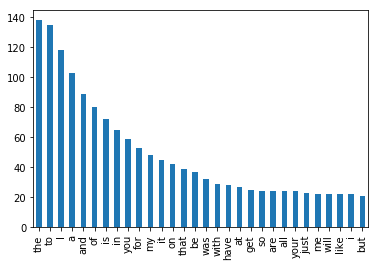

In [6]:
tkk = test_df.text.str.split(expand=True).stack().value_counts()
tkk[:30]
ax = tkk[:30].plot.bar(x='lab', y='val', rot=90)

In [7]:
tkk[:30]

the     138
to      135
I       118
a       103
and      89
of       80
is       72
in       65
you      59
for      53
my       48
it       45
on       42
that     39
be       37
was      32
with     29
have     28
at       27
get      25
so       24
are      24
all      24
your     24
just     23
me       22
will     22
like     22
i        22
but      21
dtype: int64

In [8]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [9]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")


### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [10]:
# Answer here

from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

TF_IDF_1000 = CountVectorizer(max_features=1000)
tfidf = TF_IDF_1000.fit_transform(train_df['text'])

tfidf.shape

(3613, 1000)

In [11]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(tfidf)
tfidf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=TF_IDF_1000.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])
df_idf[100:110]

,idf_weights
bitter,5.342423
black,5.791373
blacks,7.113129
blame,6.707664
blessed,6.889985
blood,6.794675
bloody,6.995346
blues,5.825275
body,6.889985
boiling,6.302199


In [13]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [14]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [15]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'joy', 'joy', 'joy', 'anger', 'fear', 'sadness', 'fear',
       'fear', 'fear'], dtype=object)

In [16]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [17]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.70      0.68      0.69        84
        fear       0.68      0.68      0.68       110
         joy       0.62      0.67      0.65        79
     sadness       0.63      0.59      0.61        74

   micro avg       0.66      0.66      0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [18]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
# print(cm)

# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

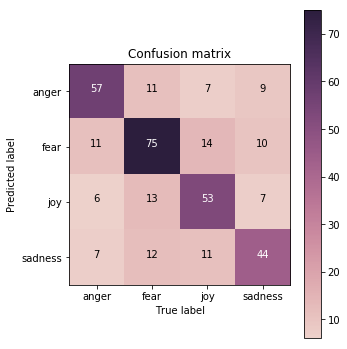

In [19]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

#The correct-rate of the 'anger' prediction is  57/84 = 0.678
#The correct-rate of the 'fear' prediction is  75/110 = 0.6818
#The correct-rate of the 'joy' prediction is  53/116 = 0.456
#The correct-rate of the 'sadness' prediction is  44/74 = 0.594

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [20]:
# Answer here
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [21]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
## predict!
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'joy', 'joy', 'fear', 'anger', 'fear', 'fear', 'fear',
       'fear', 'fear'], dtype='<U7')

In [23]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train_n = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test_n = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train_n, 2)))
print('testing accuracy: {}'.format(round(acc_test_n, 2)))

training accuracy: 0.79
testing accuracy: 0.71


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [24]:
print('Naive Bayes:')
print('training accuracy: {}'.format(round(acc_train_n, 2)))
print('testing accuracy: {}'.format(round(acc_test_n, 2)))
print('Decision Tree: ')
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

Naive Bayes:
training accuracy: 0.79
testing accuracy: 0.71
Decision Tree: 
training accuracy: 0.99
testing accuracy: 0.66


answer here

The training accuracy is Decision Tree higher, though the test accuracy is Naive Bayes higher.
Decision tree may neglect some key values in training data, which can lead the accuracy for a loss.

# -------------------------------------------------------

In [25]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 454       anger
3200    sadness
414       anger
1568       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [27]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [28]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
____________________________________________

In [29]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 0s 95us/step - loss: 1.3332 - accuracy: 0.3460 - val_loss: 1.2641 - val_accuracy: 0.4784
Epoch 2/25
3613/3613 [==============================] - 0s 50us/step - loss: 0.9912 - accuracy: 0.6499 - val_loss: 0.9098 - val_accuracy: 0.6513
Epoch 3/25
3613/3613 [==============================] - 0s 49us/step - loss: 0.5792 - accuracy: 0.7991 - val_loss: 0.7577 - val_accuracy: 0.7176
Epoch 4/25
3613/3613 [==============================] - 0s 50us/step - loss: 0.4224 - accuracy: 0.8420 - val_loss: 0.8082 - val_accuracy: 0.7205
Epoch 5/25
3613/3613 [==============================] - 0s 50us/step - loss: 0.3385 - accuracy: 0.8735 - val_loss: 0.8106 - val_accuracy: 0.7003
Epoch 6/25
3613/3613 [==============================] - 0s 50us/step - loss: 0.2779 - accuracy: 0.9059 - val_loss: 0.8321 - val_accuracy: 0.7262
Epoch 7/25
3613/3613 [==============================] - 0s 50us/step - loss: 0.234

In [30]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[2.3687123e-01, 9.4053494e-03, 3.2373053e-01, 4.2999282e-01],
       [6.9232527e-07, 6.5115551e-06, 9.9999285e-01, 3.0140452e-08],
       [1.5524380e-03, 3.6032367e-02, 9.6128553e-01, 1.1296273e-03],
       [6.8569272e-05, 6.0393298e-01, 1.3299437e-02, 3.8269904e-01],
       [9.9999917e-01, 5.1310483e-08, 5.4421703e-09, 8.4730203e-07]],
      dtype=float32)

In [31]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'joy', 'joy', 'fear', 'anger'], dtype=object)

In [32]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [33]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.345973,1.333206,0.478386,1.264111
1,1,0.649875,0.991181,0.651297,0.909832
2,2,0.799059,0.579187,0.717579,0.757730
3,3,0.841960,0.422410,0.720461,0.808211
4,4,0.873512,0.338516,0.700288,0.810590
5,5,0.905895,0.277886,0.726225,0.832061
6,6,0.918350,0.234839,0.703170,0.861948
7,7,0.933296,0.201184,0.697406,0.904761
8,8,0.945751,0.168654,0.694524,0.943361
9,9,0.955162,0.142366,0.708934,0.991572


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of

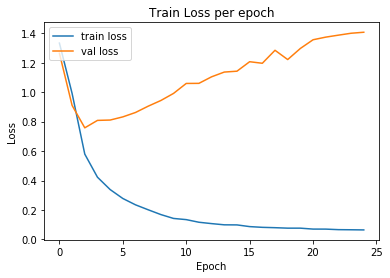

In [34]:
# Answer here
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(training_log['loss'])
plt.plot(training_log['val_loss'])
plt.title('Train Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

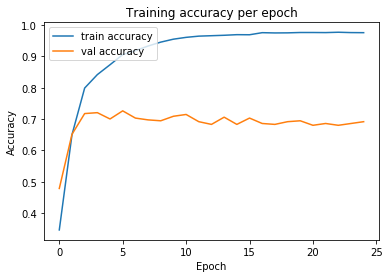

In [35]:
# Answer here
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(training_log['accuracy'])
plt.plot(training_log['val_accuracy'])
plt.title('Training accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

Answer here
use "doc2vec" implementation. doc2vec is an extension of word2vec to the phrase-, sentence-, and document-level.

# -----------------------------------------------------------------------------------------

In [36]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
454,10454,@LaraTheIrish &lt; feel everything. She would ...,"[@, LaraTheIrish, &, lt, ;, feel, everything, ..."
3200,40373,Y'all tune into Snapchat for Beans funereal,"[Y'all, tune, into, Snapchat, for, Beans, fune..."
414,10414,i can't believe they're all messing up my favo...,"[i, ca, n't, believe, they, 're, all, messing,..."
1568,20711,"@GlobeChadFinn Sadly, not enough names. The w...","[@, GlobeChadFinn, Sadly, ,, not, enough, name..."
3558,40731,Damn gud #premiere #LethalWeapon...#funny and,"[Damn, gud, #, premiere, #, LethalWeapon, ...,..."


In [37]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'LaraTheIrish', '&', 'lt', ';', 'feel', 'everything', '.', 'She', 'would', 'remember', 'everything', '.', 'Evanora', 'hoped', 'this', 'would', 'serve', 'to', 'fuel', 'the', 'creatures', 'anger', 'and', 'run', 'rabid', '&', 'gt', ';']),
       list(["Y'all", 'tune', 'into', 'Snapchat', 'for', 'Beans', 'funereal']),
       list(['i', 'ca', "n't", 'believe', 'they', "'re", 'all', 'messing', 'up', 'my', 'favourite', 'of', 'all', 'bakes', 'i', 'feel', 'personally', 'offended'])],
      dtype=object)

In [38]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
454,10454,@LaraTheIrish &lt; feel everything. She would ...,"[@, LaraTheIrish, &, lt, ;, feel, everything, ..."
3200,40373,Y'all tune into Snapchat for Beans funereal,"[Y'all, tune, into, Snapchat, for, Beans, fune..."
414,10414,i can't believe they're all messing up my favo...,"[i, ca, n't, believe, they, 're, all, messing,..."
1568,20711,"@GlobeChadFinn Sadly, not enough names. The w...","[@, GlobeChadFinn, Sadly, ,, not, enough, name..."
3558,40731,Damn gud #premiere #LethalWeapon...#funny and,"[Damn, gud, #, premiere, #, LethalWeapon, ...,..."


In [39]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [40]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

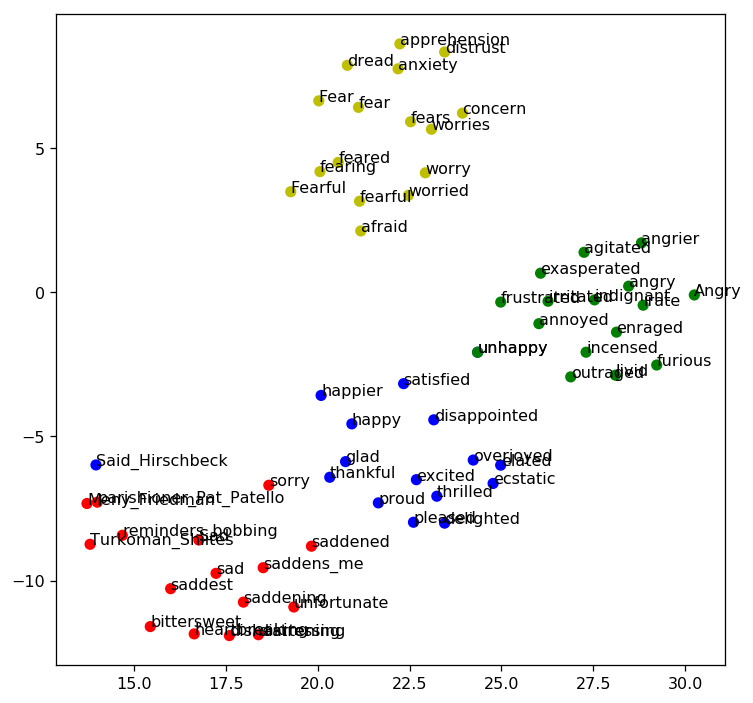

In [44]:
# Answer here
word_list = [ 'angry', 'happy', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]  

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Load data

In [45]:
### Begin Assignmes
import pandas as pd
data_id = pd.read_csv('data_identification.csv')
emotion = pd.read_csv('emotion.csv')
tweets = pd.read_json('tweets_DM.json',lines = True)

print(data_id.head())
print('------------')
print(emotion.head())
print('------------')
print(tweets.head())


   tweet_id identification
0  0x28cc61           test
1  0x29e452          train
2  0x2b3819          train
3  0x2db41f           test
4  0x2a2acc          train
------------
   tweet_id       emotion
0  0x3140b1       sadness
1  0x368b73       disgust
2  0x296183  anticipation
3  0x2bd6e1           joy
4  0x2ee1dd  anticipation
------------
   _score          _index                                            _source  \
0     391  hashtag_tweets  {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...   
1     433  hashtag_tweets  {'tweet': {'hashtags': ['freepress', 'TrumpLeg...   
2     232  hashtag_tweets  {'tweet': {'hashtags': ['bibleverse'], 'tweet_...   
3     376  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...   
4     989  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x2de2...   

            _crawldate   _type  
0  2015-05-23 11:42:47  tweets  
1  2016-01-28 04:52:09  tweets  
2  2017-12-25 04:39:20  tweets  
3  2016-01-24 23:53:05  tweets  
4  2016-01

In [46]:
import json
from pandas.io.json import json_normalize

#used for nested format column['_source']
n_tweets = json_normalize(tweets['_source'])

n_tweets.head(5)

,tweet.hashtags,tweet.tweet_id,tweet.text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [47]:
n_tweets.rename(columns={'tweet.hashtags': 'hashtags', 'tweet.text': 'text', 'tweet.tweet_id': 'tweet_id'}, inplace=True)
n_tweets.head(5)

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


merge

In [48]:
merge_data = pd.merge(n_tweets, data_id, how = 'outer',on = ['tweet_id'])
merge_data = pd.merge(merge_data,emotion,how = 'outer',on = ['tweet_id'])
merge_data.head()

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN


In [49]:
df_train = merge_data[merge_data['identification'] == 'train']
df_test = merge_data[merge_data['identification'] == 'test']
df_train.shape

(1455563, 5)

In [50]:
df_train.head()

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation


In [51]:
df_test.shape

(411972, 5)

# Save data

save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.

In [52]:
## save to pickle file
df_train.to_pickle("train_df_Hsiao.pkl") 
df_test.to_pickle("test_df_Hsiao.pkl")

In [53]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df_Hsiao.pkl")
test_df = pd.read_pickle("test_df_Hsiao.pkl")

In [54]:
train_df.head()

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation


# Exploratory data analysis

In [55]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

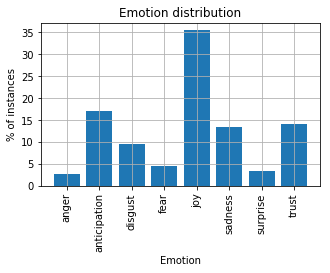

In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.xticks(df1.index, rotation='vertical')
plt.grid(True)
plt.show()

# Feature engineering

In [57]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(1455563, 500)

In [58]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [59]:
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'christ',
 'christmas',
 'class',
 'closed',
 'come',
 'comes',
 'coming',
 'could',
 'country']

In [60]:
"😂" in feature_names_500

True

# Decision Trees

Desion Trees cost too much time and the accuracy is low, so on I try other classifier in the follows.

In [61]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


X_train.shape:  (1455563, 500)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 500)
y_test.shape:  (411972,)


In [62]:
# ## build DecisionTree model
# DT_model = DecisionTreeClassifier(random_state=0)

# ## training!
# DT_model = DT_model.fit(X_train, y_train)

# ## predict!
# y_train_pred = DT_model.predict(X_train)
# y_test_pred = DT_model.predict(X_test)

# ## so we get the pred result
# y_test_pred[:10]

In [63]:
# ## accuracy
# from sklearn.metrics import accuracy_score

# acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
# acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

# print('training accuracy: {}'.format(round(acc_train, 2)))
# print('testing accuracy: {}'.format(round(acc_test, 2)))

In [64]:
# ## precision, recall, f1-score,
# from sklearn.metrics import classification_report

# print(classification_report(y_true=y_test, y_pred=y_test_pred))

# using different Vectorizers and Classifiers
* I first only try 10000 each cut data.
* The speed and prefromance of **HashingVectorizer** is better than BOW & TFIDF.
 * under the best parameter, the post can get 0.38 acc.(with SGDClassifier)
* The **GaussianNB** takes too many time and doesn't prefrom well.
* The **SGDClassifier** runs super,super,super quick.

In [65]:
train_df = pd.read_pickle("train_df_Hsiao.pkl")
test_df = pd.read_pickle("test_df_Hsiao.pkl")

In [66]:
train_df.to_csv('train_df.csv')
test_df.to_csv('test_df.csv')

In [67]:
def get_stream(path, size):
    for chunk in pd.read_csv(path, chunksize=size, encoding='utf-8', engine='python'):
        yield chunk

print(next(get_stream(path='train_df.csv', size=5)))

   Unnamed: 0                             hashtags  tweet_id  \
0           0                         ['Snapchat']  0x376b20   
1           1  ['freepress', 'TrumpLegacy', 'CNN']  0x2d5350   
2           3                                   []  0x1cd5b0   
3           5        ['authentic', 'LaughOutLoud']  0x1d755c   
4           6                                   []  0x2c91a8   

                                                text identification  \
0  People who post "add me on #Snapchat" must be ...          train   
1  @brianklaas As we see, Trump is dangerous to #...          train   
2                Now ISSA is stalking Tasha 😂😂😂 <LH>          train   
3  @RISKshow @TheKevinAllison Thx for the BEST TI...          train   
4       Still waiting on those supplies Liscus. <LH>          train   

        emotion  
0  anticipation  
1       sadness  
2          fear  
3           joy  
4  anticipation  


In [68]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.replace("<LH>", "")
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

tmp_text = cleanSentences(train_df['text'][0])
tmp_text

'people who post add me on snapchat must be dehydrated cuz man thats '

In [69]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import nltk

In [70]:
classes = np.unique(train_df['emotion'])

hashvec = HashingVectorizer(n_features=2**20, strip_accents = 'unicode',tokenizer=nltk.word_tokenize)
# using the cleanSentences() doesn't improve the accuracy. QQ
# hashvec = hashvec = HashingVectorizer(n_features=2**10, preprocessor=cleanSentences,strip_accents = 'unicode',tokenizer=nltk.word_tokenize)

clf = SGDClassifier(loss='modified_huber', max_iter=500)
#clf = MultinomialNB()

batch_size = 10000
stream = get_stream(path='train_df.csv', size=batch_size)

train_auc, val_auc = [], []

# we use one batch for training and another for validation in each iteration
iters = len(train_df)//(batch_size*2)

In [72]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

for i in range(iters):
    batch = next(stream)
    batch.dropna(inplace=True)
    if len(batch)==0:
        print('null')
        continue
    X_train,y_train = batch['text'],batch['emotion']
    if X_train is None:
        break  
    
    X_train = hashvec.transform(X_train)
#     X_train = SelectKBest(chi2, k=300).fit_transform(X_train, y_train)
#     print(X_new.shape)

    clf.partial_fit(X_train, y_train, classes=classes)
    acc = 0
    count = 0
    train_pred = clf.predict(X_train)
    for j in y_train:
        if j == train_pred[count]:
            acc += 1
        count += 1
    train_auc.append(acc/batch_size)
    
    # validate
    batch = next(stream)
    batch.dropna(inplace=True)
    if len(batch)==0:
        print('null')
        continue
    X_val, y_val = batch['text'],batch['emotion']
    
    X_val = hashvec.transform(X_val)
    acc = 0
    count = 0
    test_pred = clf.predict(X_val)
    for j in y_val:
        if j == test_pred[count]:
            acc += 1
        count += 1
    val_auc.append(acc/batch_size)
    print('[%d/%d] %f' % ((i+1)*(batch_size*2), len(train_df), acc/batch_size))
    
    if i == 10:
        break

[20000/1455563] 0.336000
[40000/1455563] 0.376300
[60000/1455563] 0.447600
[80000/1455563] 0.436400
[100000/1455563] 0.405900
[120000/1455563] 0.435800
[140000/1455563] 0.470200
[160000/1455563] 0.474800
[180000/1455563] 0.464500
[200000/1455563] 0.480800
[220000/1455563] 0.483300


The above show the experiments processes.

Running 10-20% of all data can find that the result already become converge.

The following plot shows that.

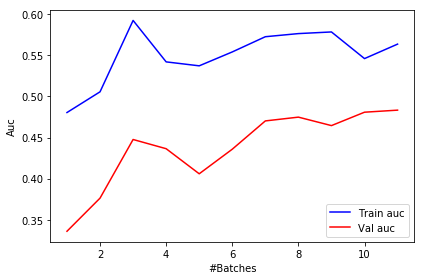

In [73]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(train_auc)+1), train_auc, color='blue', label='Train auc')
plt.plot(range(1, len(train_auc)+1), val_auc, color='red', label='Val auc')
plt.legend(loc="best")
plt.xlabel('#Batches')
plt.ylabel('Auc')
plt.tight_layout()
plt.savefig('./fig-out-of-core.png', dpi=300)
plt.show()

In [74]:
X_val = hashvec.transform(test_df['text'])
pred = clf.predict(X_val)

In [75]:
test_df['emotion'] = pred
test_df['id'] = test_df['tweet_id']
test_df.to_csv('output.csv', columns=['id', 'emotion'], index=False)

In [76]:
test_df.head()

,hashtags,tweet_id,text,identification,emotion,id
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,anticipation,0x28b412
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,anticipation,0x2de201
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,disgust,0x218443
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,joy,0x2939d5
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,trust,0x26289a


# select feature

after compare SGD with GaussianNB, hashvec and BOW, I use the selectKbest with BOW in SGD, however it didn't get better performance than hashvec 

In [77]:
train_df = pd.read_pickle("train_df_Hsiao.pkl")
test_df = pd.read_pickle("test_df_Hsiao.pkl")

In [78]:
train_df.to_csv('train_df.csv')
test_df.to_csv('test_df.csv')

In [79]:
def get_stream(path, size):
    for chunk in pd.read_csv(path, chunksize=size, encoding='utf-8', engine='python'):
        yield chunk

print(next(get_stream(path='train_df.csv', size=5)))

   Unnamed: 0                             hashtags  tweet_id  \
0           0                         ['Snapchat']  0x376b20   
1           1  ['freepress', 'TrumpLegacy', 'CNN']  0x2d5350   
2           3                                   []  0x1cd5b0   
3           5        ['authentic', 'LaughOutLoud']  0x1d755c   
4           6                                   []  0x2c91a8   

                                                text identification  \
0  People who post "add me on #Snapchat" must be ...          train   
1  @brianklaas As we see, Trump is dangerous to #...          train   
2                Now ISSA is stalking Tasha 😂😂😂 <LH>          train   
3  @RISKshow @TheKevinAllison Thx for the BEST TI...          train   
4       Still waiting on those supplies Liscus. <LH>          train   

        emotion  
0  anticipation  
1       sadness  
2          fear  
3           joy  
4  anticipation  


In [80]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.replace("<LH>", "")
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

tmp_text = cleanSentences(train_df['text'][0])
tmp_text

'people who post add me on snapchat must be dehydrated cuz man thats '

In [81]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import nltk

In [82]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=10000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(1455563, 10000)

In [83]:
# from sklearn.tree import DecisionTreeClassifier

# # for a classificaiton problem, you need to provide both training & testing data
# X_train = BOW_500.transform(train_df['text'])
# y_train = train_df['emotion']

# X_test = BOW_500.transform(test_df['text'])
# y_test = test_df['emotion']

# ## take a look at data dimension is a good habbit  :)
# print('X_train.shape: ', X_train.shape)
# print('y_train.shape: ', y_train.shape)
# print('X_test.shape: ', X_test.shape)
# print('y_test.shape: ', y_test.shape)

In [84]:
classes = np.unique(train_df['emotion'])

hashvec = HashingVectorizer(n_features=2**20, strip_accents = 'unicode',tokenizer=nltk.word_tokenize)
# using the cleanSentences() doesn't improve the accuracy. QQ
# hashvec = hashvec = HashingVectorizer(n_features=2**10, preprocessor=cleanSentences,strip_accents = 'unicode',tokenizer=nltk.word_tokenize)

clf = SGDClassifier(loss='modified_huber', max_iter=500)
#clf = MultinomialNB()

batch_size = 10000
stream = get_stream(path='train_df.csv', size=batch_size)

train_auc, val_auc = [], []

# we use one batch for training and another for validation in each iteration
iters = len(train_df)//(batch_size*2)

In [85]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

for i in range(iters):
    batch = next(stream)
    batch.dropna(inplace=True)
    if len(batch)==0:
        print('null')
        continue
    X_train,y_train = batch['text'],batch['emotion']
    if X_train is None:
        break  
    
    X_train = BOW_500.transform(X_train)
    X_train = SelectKBest(chi2, k=2000).fit_transform(X_train, y_train)
    print(X_train.shape)

    clf.partial_fit(X_train, y_train, classes=classes)
    acc = 0
    count = 0
    train_pred = clf.predict(X_train)
    for j in y_train:
        if j == train_pred[count]:
            acc += 1
        count += 1
    train_auc.append(acc/batch_size)
    
    # validate
    batch = next(stream)
    batch.dropna(inplace=True)
    if len(batch)==0:
        print('null')
        continue
    X_val, y_val = batch['text'],batch['emotion']
    
    X_val = BOW_500.transform(X_val)
    X_val = SelectKBest(chi2, k=2000).fit_transform(X_val, y_val)
    acc = 0
    count = 0
    test_pred = clf.predict(X_val)
    for j in y_val:
        if j == test_pred[count]:
            acc += 1
        count += 1
    val_auc.append(acc/batch_size)
    print('[%d/%d] %f' % ((i+1)*(batch_size*2), len(train_df), acc/batch_size))
    
    if i == 10:
        break

(9990, 2000)
[20000/1455563] 0.172400
(9982, 2000)
[40000/1455563] 0.200200
(9994, 2000)
[60000/1455563] 0.097300
(9969, 2000)
[80000/1455563] 0.176800
(9986, 2000)
[100000/1455563] 0.091400
(9976, 2000)
[120000/1455563] 0.107700
(9976, 2000)
[140000/1455563] 0.155600
(9988, 2000)
[160000/1455563] 0.107000
(9992, 2000)
[180000/1455563] 0.132800
(9974, 2000)
[200000/1455563] 0.144000
(9963, 2000)
[220000/1455563] 0.123000


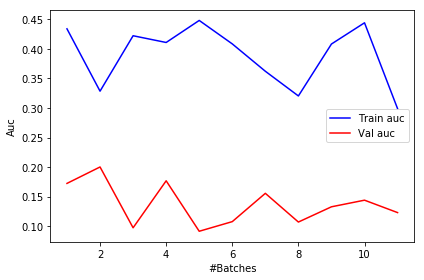

In [86]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(train_auc)+1), train_auc, color='blue', label='Train auc')
plt.plot(range(1, len(train_auc)+1), val_auc, color='red', label='Val auc')
plt.legend(loc="best")
plt.xlabel('#Batches')
plt.ylabel('Auc')
plt.tight_layout()
plt.savefig('./fig-out-of-core.png', dpi=300)
plt.show()

In [89]:

# X_val = BOW_500.transform(test_df['text'])
# X_val = SelectKBest(chi2, k=2000).fit_transform(X_val, test_df['emotion'])
# pred = clf.predict(X_val)

In [90]:
test_df['emotion'] = pred
test_df['id'] = test_df['tweet_id']
test_df.to_csv('output.csv', columns=['id', 'emotion'], index=False)

# XGBoost
the XGBoost's accuracy is worse than SGD classifier

In [91]:
import pandas as pd
train_df = pd.read_pickle("train_df_Hsiao.pkl")
test_df = pd.read_pickle("test_df_Hsiao.pkl")

In [92]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=10000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(1455563, 10000)

In [93]:


# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 10000)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 10000)
y_test.shape:  (411972,)


In [94]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## so we get the pred result
y_test_pred[:10]
y_test_pred.shape

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
# acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
# print('testing accuracy: {}'.format(round(acc_test, 2)))

In [ ]:
test_df['emotion'] = y_test_pred
test_df['id'] = test_df['tweet_id']
test_df.to_csv('output_xgboost.csv', columns=['id', 'emotion'], index=False)

# Deep Learning

Deep learning performe the best score 0.42 in puiblic, I think if I have time to do more preprocessing it can be more better.

In [ ]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import re, csv
from nltk.corpus import stopwords
import nltk
import string
from nltk import word_tokenize
from gensim.models import KeyedVectors   

In [ ]:
## load a pickle file
trains = pd.read_pickle("train_df_Hsiao.pkl")
tests = pd.read_pickle("test_df_Hsiao.pkl")

In [ ]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import HashingVectorizer

tknzr = TweetTokenizer()
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

hashvec = HashingVectorizer(n_features=5000, strip_accents = 'unicode',tokenizer=nltk.word_tokenize)

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000, 
    use_idf=True, 
#    token_pattern=u'(?u)\\b\[^\\d\\W][^\\d\\W]+\\b', 
    tokenizer=tknzr.tokenize,
    stop_words=stopwords.words('english'))

#tdidf_matrix = tfidf_vectorizer.fit_transform(trains['text'])
tfidf_vectorizer.fit(trains['text'])

In [ ]:
print(tfidf_vectorizer.get_feature_names()[:100])
print(tfidf_vectorizer.get_feature_names()[-100:])
len(tfidf_vectorizer.get_feature_names())

In [ ]:
sep = int(trains.shape[0] * 0.8) # 20% for validation

BOW_train = trains[:sep]
BOW_train_label = trains.emotion[:sep]
BOW_test = trains[sep:]
BOW_test_label = trains.emotion[sep:]

print(BOW_train.shape)
print(BOW_train_label.shape)
print(BOW_test.shape)
print(BOW_test_label.shape)

In [ ]:
import keras

# standardize name (X, y) 


X_train = tfidf_vectorizer.transform(BOW_train['text'])
y_train = BOW_train_label

X_test = tfidf_vectorizer.transform(BOW_test['text'])
y_test = BOW_test_label

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:7]:\n', y_train[0:7])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:7]:\n', y_train[0:7])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 5000
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)



# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 8
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_prototype.csv')

# training setting
epochs = 25
batch_size = 1000

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

In [ ]:
pred = model.predict(tfidf_vectorizer.transform(tests['text']), batch_size = 128)
pred = label_decode(label_encoder, pred) 
# print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, tests.emotion), pred), 2)))

In [ ]:
tests['emotion'] = pred
tests['id'] = tests['tweet_id']
tests.to_csv('output_2.csv', columns=['id', 'emotion'], index=False)

# LSTM

LSTM should be better than Deep learning in my opinion.
However, it didn't perform well. I think the lack of preprocessing and the unsuitable LSTM dimension selection cause the result only get 0.30778 score in public.

In [ ]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import re, csv
from nltk.corpus import stopwords
import nltk
import string
from nltk import word_tokenize
from gensim.models import KeyedVectors   
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer


import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Embedding
from keras.layers import Bidirectional
# from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import tokenizer_from_json
from keras.utils import to_categorical
from keras.initializers import Constant

In [ ]:
## load a pickle file
import pandas as pd
trains = pd.read_pickle("train_df_Hsiao.pkl")
tests = pd.read_pickle("test_df_Hsiao.pkl")

In [ ]:
tknr = Tokenizer(num_words=None, 
               filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ ', 
               lower=True, 
               split=' ', 
               char_level=False, 
               oov_token=None, 
               document_count=0)

In [ ]:
tknzr = TweetTokenizer()
# TF-IDF
MAX_WORD = 15000


tfidf_vectorizer = TfidfVectorizer(
    max_features=MAX_WORD, 
    use_idf=True, 
    token_pattern='(?u)\\b[^\\d\\W][^\\d\\W]+\\b', 
#     tokenizer=tknzr.tokenize,
#     stop_words=stopwords.words('english')
    )
tfidf_vectorizer.fit(trains['text'])

In [ ]:
token_dict = {}
for idx, token in enumerate(tfidf_vectorizer.get_feature_names()):
    token_dict[token] = idx

In [ ]:
EMBEDDING_DIM = 300
# MAX_WORD = 5000
def word2vec_matrix():
#     token_dict = tknr.word_index()
    matrix_emb = np.zeros((len(token_dict)+1, EMBEDDING_DIM)) # replace MAX_WORD to len(token_dict)
    for word, idx in token_dict.items():
        try:
            vector =  word2vec_model.wv[word]
        except:
            vector = np.zeros(300,)
#         if idx < MAX_WORD and vector:
        if idx < MAX_WORD:
            matrix_emb[idx] = np.array(vector)
    matrix_emb[MAX_WORD] = np.zeros(300,)     
    return matrix_emb

In [ ]:
MAX_SEQUENCE_LENGTH = 50

def text_to_sequence(texts):
    tokenized_texts = []
    for string in texts:
        tokenized_text = []
        for idx, word in enumerate(string.split(' ')):
            
            # truncate
            if idx >= MAX_SEQUENCE_LENGTH: break 
                
            try:
                token = token_dict[word.lower()]
            except:
                token = MAX_WORD
            tokenized_text.append(token)
            
        # padding 
        if len(tokenized_text) < MAX_SEQUENCE_LENGTH: 
#             print(len(tokenized_text))
            tokenized_text.extend([MAX_WORD]*(MAX_SEQUENCE_LENGTH-len(tokenized_text)))
                
        tokenized_texts.append(tokenized_text)
    

#     print(max([len(texts) for texts in tokenized_texts]))
    return np.array(tokenized_texts)

In [ ]:
emotion_array = ['joy', 'sadness', 'trust', 'anticipation', 'fear', 'anger', 'disgust', 'surprise']

In [ ]:
def emotion_to_sequence(emotions):
    tokenized_emotions = []
    for string in emotions:
        token = emotion_array.index(string)
#         print(token)
        tokenized_emotions.append(token)
    return to_categorical(tokenized_emotions)

In [ ]:
train_sequence = text_to_sequence(trains['text'])
train_label = emotion_to_sequence(trains['emotion'])

In [ ]:
text_sequence = text_to_sequence(tests['text'])

In [ ]:
from sklearn.metrics import accuracy_score

LSTM1_DIM = 100
LSTM2_DIM = 200
DENSE1_DIM = 200
DENSE2_DIM = 200
CATEGORY_NUM = 8
BATCH_SIZE = 4096
VALIDATION_SPLIT = 0.2
EPOCHS = 10

csv_logger = CSVLogger('logs/training_log_30.csv')
                    

def model_setting(texts, labels, matrix_emb="uniform"):
    #######################################
    # build up the model 
    # input: texts (dataframe), labels (dataframe), embedding matrix (np array), model name (str)
    # output: None
    #######################################
    
    import numpy as np
    import pandas as pd
    DROPOUT = 0.1
    
    if matrix_emb != "uniform": matrix_emb = Constant(matrix_emb)
        
#     split data to train & validation
    validation_size = int(texts.shape[0]*VALIDATION_SPLIT)
    texts_train = texts[:-validation_size]
    texts_val = texts[-validation_size:]
    labels_train = labels[:-validation_size]
    labels_val = labels[-validation_size:]
    
    # model build
    model = Sequential()
#     model.add(Dropout(0.1, input_shape=(MAX_SEQUENCE_LENGTH,)))
    model.add(Embedding(MAX_WORD+1, EMBEDDING_DIM, embeddings_initializer=matrix_emb, input_length=MAX_SEQUENCE_LENGTH, trainable=False)) # with embedding matrix
#     model.add(Embedding(MAX_WORD, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)) # without embedding matrix
#     model.add(LSTM(LSTM1_DIM, dropout=DROPOUT, recurrent_dropout=DROPOUT, return_sequences=True))
    model.add(LSTM(LSTM1_DIM, dropout=DROPOUT, recurrent_dropout=DROPOUT, return_sequences=False))

#     model.add(Bidirectional(LSTM(LSTM1_DIM, dropout=DROPOUT, recurrent_dropout=DROPOUT)))
#     model.add(LSTM(LSTM2_DIM, dropout=DROPOUT, recurrent_dropout=DROPOUT))
#     model.add(Bidirectional(LSTM(LSTM2_DIM)))
    model.add(Dense(DENSE1_DIM, kernel_initializer='normal', activation='relu'))
    model.add(Dense(DENSE2_DIM, kernel_initializer='normal', activation='relu'))
    model.add(Dense(CATEGORY_NUM, kernel_initializer='normal', activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
    model.summary()

    
    history_callback = model.fit(
        texts_train, 
        labels_train, 
        epochs=EPOCHS, 
        batch_size=BATCH_SIZE, 
        callbacks=[csv_logger],
        verbose=1, 
        shuffle=True, 
        validation_data=(texts_val, labels_val))



    #print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))
    
    
    return history_callback, model

In [ ]:
history_callback, mymodel = model_setting(train_sequence, train_label, word2vec_matrix())

In [ ]:
## predict
    
pred_result = mymodel.predict(text_sequence, batch_size=128)


In [ ]:
pred_result = np.argmax(pred_result, axis=1)

In [ ]:
results = [emotion_array[i]  for i in pred_result]
pred = tests
pred['emotion'] = results
pred = pred.drop('hashtags', axis=1)
pred = pred.drop('text', axis=1)
pred = pred.drop('identification', axis=1)
pred.rename(columns={'tweet_id':'id'}, inplace=True)
pred.head()
pred.to_csv('output_LSMT.csv', index=False)